In [1]:
#ignore
%pylab
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
from deplete.colloids import *

Using matplotlib backend: agg
Populating the interactive namespace from numpy and matplotlib


# 基本数据结构
+ 曲线由分段圆弧组成
+ 直线可以看作是一种特殊的半径为无穷大的圆弧

## 优良性质
__引理__ 分段圆弧扩展之后的曲线依然是分段圆弧
+ 直线扩展后还是直线
+ 半径为$R$的圆扩展$d$后是半径为$R+d$的圆
+ 转接点扩展$d$后产生的新的曲线是圆$d$
+ 综上，无论怎么扩展，扩展前后曲线类型不变。

## 判断圆弧/直线相交
+ __直线段与直线段__ 叉乘
+ __直线与圆弧__ 计算直线与圆的交点，判断其是否在段上
+ __圆弧与圆弧__ 计算圆与圆的交点，判断其是否在段上

# 扩展
+ 设定好定向，对应图像轮廓由一系列矢量弧段$a_1, a_2,\ldots a_n$组成
+ 普通段普通扩展$a_i\rightarrow a_i'$
     + 区分角度增加/减少的区别
         - 角度**增加**的时候半径为正$r=|r|$
         - 角度**减少**的时候半径为负$r=-|r|$
     + 做变换$r\rightarrow r'=r+d$
+ 转折点
     + 如果顺拐，即$a_i\times a_{i+1}>0$，转折段扩展出圆弧
     + 如果逆拐，即$a_i\times a_{i+1}<0$，转折段可以扩展出圆弧，但是直线更适合处理，因为终究需要剪除
+ 我们最终得到了边界本身扩展后的边界，但是有部分面积被环绕了多次
    + 解决方法：剪除重复的正面积，保留真正的边界，即最大的正边界

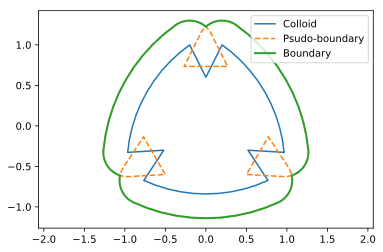

In [4]:
#ignore
c=triangloid(1, 1, 0.2, -0.4)
c.draw(label='Colloid')
c.offset_raw(0.3).draw('--', label='Psudo-boundary')
c.offset(0.3).draw(linewidth=2, label='Boundary')
legend(loc="upper right")
axis('equal');

# 相交
把两个当成一个整体